In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
from collections import Counter
from multiprocessing import Pool
import itertools
import json
import matplotlib.pyplot as plt

In [2]:
folder="dataset_v5/v5_2/"

In [3]:
mod_ment2 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_2.csv', sep =",")

In [8]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId'],
      dtype='object')

In [6]:
pd.unique(mod_ment2['instituteId']).shape

(367,)

In [7]:
nodes=list(pd.unique(mod_ment2['instituteId']).copy())

In [66]:
inst_index=dict(zip(mod_ment2['instituteId'], mod_ment2['publisher_institution']))

In [68]:
#inst_index

In [61]:
#list(nodes)

In [12]:
graph = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','instituteId', create_using=nx.DiGraph())
graph.remove_edges_from(nx.selfloop_edges(graph))
cycle=list(nx.simple_cycles(graph))
graph.remove_edges_from(cycle)

In [45]:
edge_list=[]
for n1,n2, e_attr in graph.edges(data=True):
    n_1=e_attr['instituteId']
    if graph[n2]:
        for n2_neigh in graph[n2]:
            n_2=graph[n2][n2_neigh]['instituteId']
            edge_list.append((n_1,n_2))
    else:
        continue

In [40]:
gr_dict=dict(graph[205662])
for a in gr_dict:
    if gr_dict[a]:
        print('true')
    else:
        print('false')

In [27]:
graph[123]

AtlasView({93744: {'instituteId': 'I87'}, 93760: {'instituteId': 'I87'}, 93765: {'instituteId': 'I87'}, 93772: {'instituteId': 'I87'}, 93868: {'instituteId': 'I87'}, 185902: {'instituteId': 'I87'}, 185913: {'instituteId': 'I87'}, 185941: {'instituteId': 'I87'}, 239: {'instituteId': 'I87'}, 185987: {'instituteId': 'I87'}, 185960: {'instituteId': 'I87'}, 185992: {'instituteId': 'I87'}, 185995: {'instituteId': 'I87'}, 186022: {'instituteId': 'I87'}})

In [44]:
if graph[1234]:
    print(graph[1234])
else:
    print('f')

{96103: {'instituteId': 'I47'}}


In [47]:
edge_list=[(n1,n2) for n1,n2 in edge_list if n1!=n2]

In [48]:
edge_list=set(edge_list)

In [50]:
len(edge_list)

843

In [51]:
G=nx.DiGraph()

In [54]:
G.add_nodes_from(nodes)

In [55]:
G.add_edges_from(edge_list)

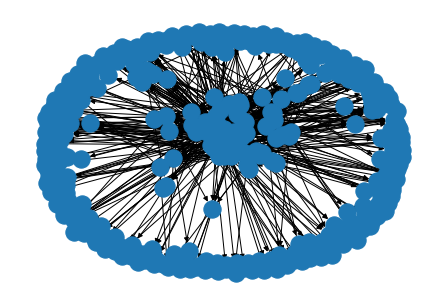

In [62]:
nx.draw(G, pos=nx.spring_layout(G))

In [93]:
from matplotlib import pylab
import networkx as nx

def save_graph(graph,file_name):
#initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    plt.show()
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.pdf")

In [58]:
components = list(nx.weakly_connected_components(G))
components.sort(key=len, reverse=True)

In [60]:
len(components[0])

229

In [69]:
inst_pair=[]
for a , b in edge_list:
    inst_pair.append((inst_index[a],inst_index[b]))

In [71]:
#inst_pair

In [72]:
influential=nx.voterank(G, 10)

In [73]:
influential

['I87', 'I35', 'I281', 'I351', 'I250', 'I306', 'I292', 'I333', 'I75', 'I49']

In [74]:
for i in influential:
    print(inst_index[i])

Panjab University
Maharshi Dayanand University
University of Calcutta
Savitribai Phule Pune University
Anna University
V. B. S. Purvanchal University
Aligarh Muslim University
Alagappa University
Utkal University
Himachal Pradesh University


In [75]:
inst_cent=nx.betweenness_centrality(G)

In [83]:
inst_cent_sorted=dict(sorted(inst_cent.items(), key=lambda item: item[1], reverse=True))

In [88]:
count=0
for i in inst_cent_sorted:
    count+=1
    print(i, inst_index[i])
    if count==10:
        break

I351 Savitribai Phule Pune University
I35 Maharshi Dayanand University
I87 Panjab University
I281 University of Calcutta
I292 Aligarh Muslim University
I85 Jawaharlal Nehru University
I253 Bharathiar University
I86 North-Eastern Hill University
I172 Cochin University of Science and Technology
I306 V. B. S. Purvanchal University


In [89]:
#inst_cent_sorted

In [92]:
#inst_index.values()